In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
mst_rec_date = session.query(func.max(measurement.date)).first()
mst_rec_date

('2017-08-23',)

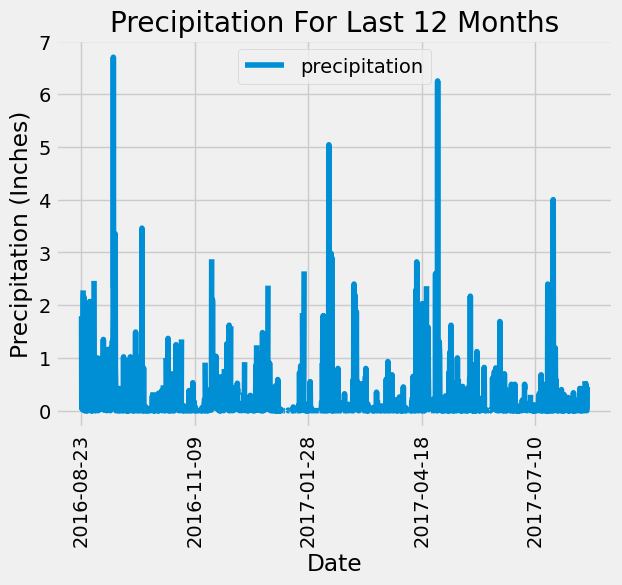

<Figure size 700x700 with 0 Axes>

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_yr).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precip = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df_precip = df_precip.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df_precip.plot(x='date', y='precipitation', rot=90,)

# Setting labels and title for bar graph
plt.title("Precipitation For Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")

# Save the bar graph
plt.savefig("Images/graph-1.png")

# Set bar graph size
plt.figure(figsize=(7, 7))

# display the bar graph
plt.tight_layout()
plt.show()

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precip.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
query_stations = session.query(measurement).group_by(measurement.station).count()
print(query_stations)

9


In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_act_stations = session.query(measurement.station, func.count(measurement.station)).\
                     group_by(measurement.station).\
                     order_by(func.count(measurement.station).desc()).all()
query_act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').\
    first()
print(station_temp)

##Alternate Way To Accomplish Same As Above##
#station_temp = session.query(
#        func.min(measurement.tobs),
#        func.max(measurement.tobs),
#        func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
#station_temp

(54.0, 85.0, 71.66378066378067)


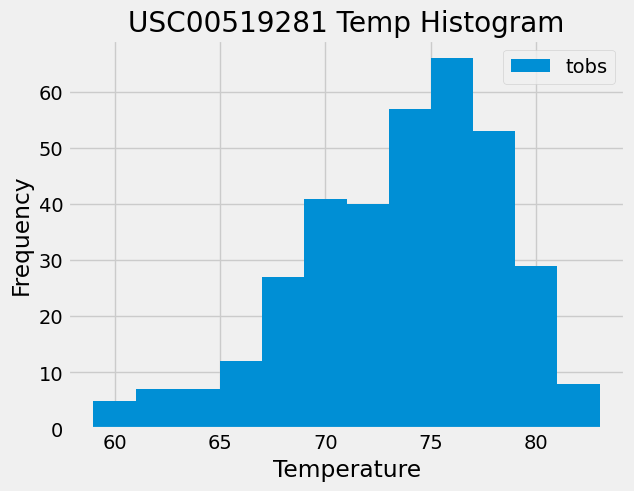

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query to gather last  12 months of temperature data for USC00519281
prev_yr_temps = session.query(measurement.tobs).filter(
    measurement.date >= prev_yr,
    measurement.station == 'USC00519281'
    ).all()

#creating dataframe using results of the above query
df_prev_yr_temps = pd.DataFrame(prev_yr_temps, columns=['tobs'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(df_prev_yr_temps['tobs'], bins=12, label='tobs')
plt.legend()

# Setting labels for graph
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('USC00519281 Temp Histogram')

# Save the bar graph
plt.savefig("Images/graph-2.png")

# display the bar graph
plt.show()

# Close Session

In [15]:
# Close Session
session.close()